In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sns.set_theme(style="darkgrid", palette="Paired", context="paper")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/db/DBtrainrides.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061357 entries, 0 to 2061356
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   line                   object 
 2   path                   object 
 3   eva_nr                 int64  
 4   category               int64  
 5   station                object 
 6   state                  object 
 7   city                   object 
 8   zip                    int64  
 9   long                   float64
 10  lat                    float64
 11  arrival_plan           object 
 12  departure_plan         object 
 13  arrival_change         object 
 14  departure_change       object 
 15  arrival_delay_m        int64  
 16  departure_delay_m      int64  
 17  info                   object 
 18  arrival_delay_check    object 
 19  departure_delay_check  object 
dtypes: float64(2), int64(5), object(13)
memory usage: 314.5+ MB


In [ ]:
# correct data types from columns
date_format = "%Y-%m-%d %H:%M:%S"
df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], format=date_format)
df["departure_plan"] = pd.to_datetime(df["departure_plan"], format=date_format)
df["arrival_change"] = pd.to_datetime(df["arrival_change"], format=date_format)
df["departure_change"] = pd.to_datetime(df["departure_change"], format=date_format)

df["arrival_plan_time"] = df["arrival_plan"].dt.time
df["arrival_plan_date"] = df["arrival_plan"].dt.date

df["departure_plan_time"] = df["departure_plan"].dt.time
df["departure_plan_date"] = df["departure_plan"].dt.date

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061357 entries, 0 to 2061356
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   line                   object        
 2   path                   object        
 3   eva_nr                 int64         
 4   category               int64         
 5   station                object        
 6   state                  object        
 7   city                   object        
 8   zip                    int64         
 9   long                   float64       
 10  lat                    float64       
 11  arrival_plan           datetime64[ns]
 12  departure_plan         datetime64[ns]
 13  arrival_change         datetime64[ns]
 14  departure_change       datetime64[ns]
 15  arrival_delay_m        int64         
 16  departure_delay_m      int64         
 17  info                   object        
 18  arrival_delay_check   

In [ ]:
df.head()

,ID,line,path,eva_nr,category,station,state,city,zip,long,...,departure_change,arrival_delay_m,departure_delay_m,info,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date,departure_plan_time,departure_plan_date
0,1573967790757085557-2407072312-14,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,2024-07-08 00:04:00,3,3,NaN,on_time,on_time,00:00:00,2024-07-08,00:01:00,2024-07-08
1,349781417030375472-2407080017-1,18,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,NaT,0,0,NaN,on_time,on_time,NaT,NaT,00:17:00,2024-07-08
2,7157250219775883918-2407072120-25,1,Hamm(Westf)Hbf|Kamen|Kamen-Methler|Dortmund-Ku...,8000406,4,Aachen-Rothe Erde,Nordrhein-Westfalen,Aachen,52066,6.116475,...,2024-07-08 00:04:00,0,0,NaN,on_time,on_time,00:03:00,2024-07-08,00:04:00,2024-07-08
3,349781417030375472-2407080017-2,18,Aachen Hbf,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,...,NaT,0,0,NaN,on_time,on_time,00:20:00,2024-07-08,00:21:00,2024-07-08
4,1983158592123451570-2407080010-3,33,Herzogenrath|Kohlscheid,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,...,2024-07-08 00:21:00,0,0,NaN,on_time,on_time,00:20:00,2024-07-08,00:21:00,2024-07-08


In [ ]:
df["info"].value_counts() # this column is not of our interest. It does not provide information we require such as [arrival_plan	departure_plan	arrival_change] columns.

,count
info,
Information,244033
Störung,116325
Bauarbeiten,96301
Information. (Quelle: zuginfo.nrw),78977
Bauarbeiten. (Quelle: zuginfo.nrw),72555
Störung. (Quelle: zuginfo.nrw),28744
Großstörung,8406


<Axes: xlabel='info'>

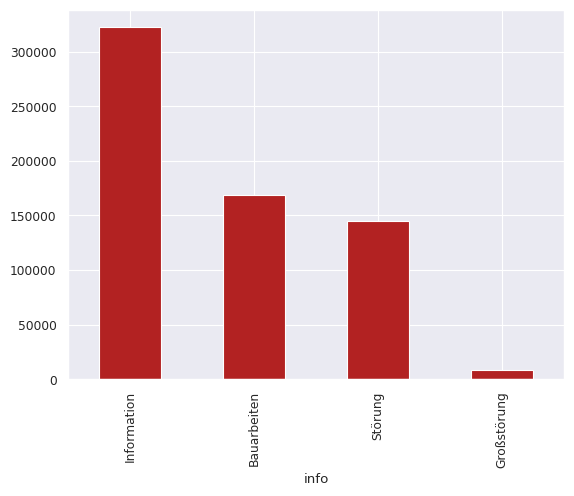

In [ ]:
dict_typo = {
    'Bauarbeiten. (Quelle: zuginfo.nrw)': 'Bauarbeiten',
    'Störung. (Quelle: zuginfo.nrw)' : 'Störung',
    'Information. (Quelle: zuginfo.nrw)' : 'Information',
}
df['info'] = df['info'].replace(dict_typo)

df["info"].value_counts().plot.bar(color="firebrick")

The following diagram depicts that most of the feedback for delays, besides "Information" which does not provide directly answer, is Bauarbeiten which in English translates as "construction work".

In [ ]:
df.duplicated().sum() # check for duplicates

6725

In [ ]:
df.drop_duplicates(keep='first', inplace=True) # delete redundant data

In [ ]:
df.isnull().sum()

,0
ID,0
line,0
path,211355
eva_nr,0
category,0
station,0
state,0
city,0
zip,0
long,0


In [ ]:
columns_to_drop = ["ID", "eva_nr", "zip"]

In [ ]:
df_clean = df.drop(columns_to_drop, axis=1, inplace=False)

In [ ]:
df_clean = df_clean.dropna() # since the amount of data to be eliminated is approx 23% which is not possible to retrieve information of railroad plan

In [ ]:
df_clean.head()

,line,path,category,station,state,city,long,lat,arrival_plan,departure_plan,...,departure_change,arrival_delay_m,departure_delay_m,info,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date,departure_plan_time,departure_plan_date
5,4,Herzogenrath,5,Aachen West,Nordrhein-Westfalen,Aachen,6.070715,50.780360,2024-07-08 00:30:00,2024-07-08 00:31:00,...,2024-07-08 00:31:00,0,0,Bauarbeiten,on_time,on_time,00:30:00,2024-07-08,00:31:00,2024-07-08
12,7,Hannover Hbf|Hannover-Kleefeld|Hannover Karl-W...,5,Ahlten (Han),Niedersachsen,Lehrte,9.904613,52.376062,2024-07-08 00:16:00,2024-07-08 00:16:00,...,2024-07-08 00:24:00,8,8,Information,delay,delay,00:16:00,2024-07-08,00:16:00,2024-07-08
13,3,Hannover Hbf|Hannover-Kleefeld|Hannover Karl-W...,5,Ahlten (Han),Niedersachsen,Lehrte,9.904613,52.376062,2024-07-08 00:46:00,2024-07-08 00:46:00,...,2024-07-08 00:46:00,0,0,Information,on_time,on_time,00:46:00,2024-07-08,00:46:00,2024-07-08
14,3,Hildesheim Hbf|Harsum|Algermissen|Sehnde|Lehrte,5,Ahlten (Han),Niedersachsen,Lehrte,9.904613,52.376062,2024-07-08 00:10:00,2024-07-08 00:11:00,...,2024-07-08 00:11:00,0,0,Information,on_time,on_time,00:10:00,2024-07-08,00:11:00,2024-07-08
28,2,Villingen(Schwarzw)|Donaueschingen|Geisingen|I...,5,Allensbach,Baden-Württemberg,Allensbach,9.068852,47.714464,2024-07-08 00:32:00,2024-07-08 00:32:00,...,2024-07-08 00:35:00,2,3,Information,on_time,on_time,00:32:00,2024-07-08,00:32:00,2024-07-08


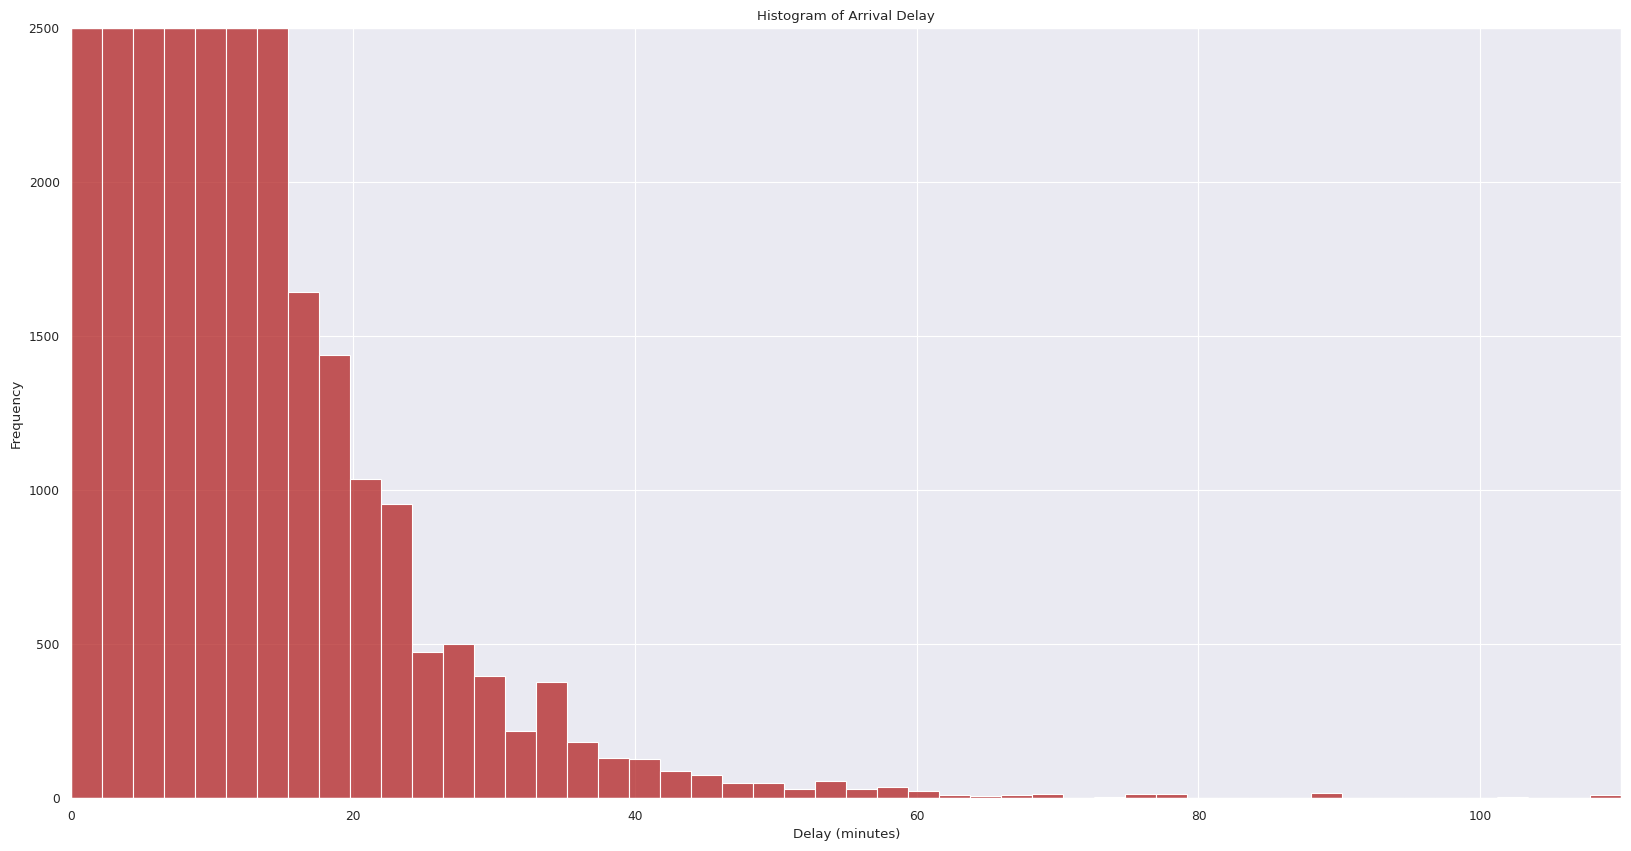

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))

sns.histplot(data=df_clean, x="arrival_delay_m", bins=50, ax=axes, color="firebrick")
axes.set_title("Histogram of Arrival Delay")
axes.set_xlabel("Delay (minutes)")
axes.set_ylabel("Frequency")
axes.set_ylim(0, 2500)

axes.set_xlim(0, df_clean["arrival_delay_m"].max())

plt.show()

Most delays seem to cluster around the lower end of the scale, suggesting that while delays are common, they tend to be shorter rather than extreme. On the other hand, the right-hand side of the histogram likely tapers off, indicating that while a few trains have significant delays, these are less frequent.

In [ ]:
df_stations = df.groupby("station", as_index=False).mean(numeric_only=True)

In [ ]:
df_stations.head()

,station,eva_nr,category,zip,long,lat,arrival_delay_m,departure_delay_m
0,Aachen Hbf,8000001.0,2.0,52064.0,6.091499,50.767800,0.235215,0.428763
1,Aachen Schanz,8070704.0,5.0,52064.0,6.073840,50.769862,1.038747,1.173949
2,Aachen West,8000404.0,5.0,52072.0,6.070715,50.780360,0.768349,0.943807
3,Aachen-Rothe Erde,8000406.0,4.0,52066.0,6.116475,50.770202,1.249737,1.243414
4,Aalen Hbf,8000002.0,3.0,73430.0,10.096271,48.841013,0.325953,0.425584


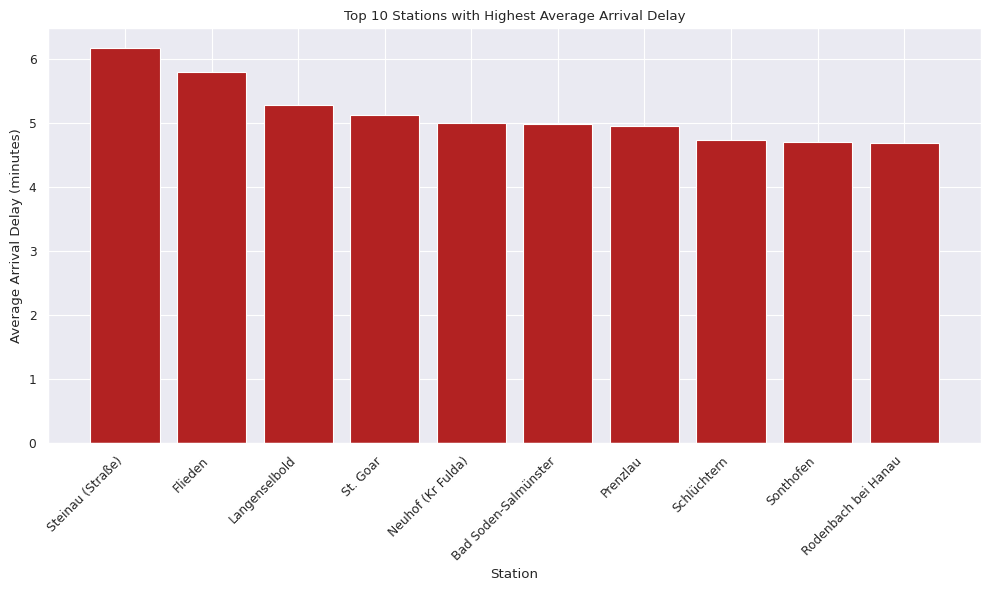

In [ ]:
top_10_delayed_stations = df_stations.sort_values('arrival_delay_m', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_delayed_stations['station'], top_10_delayed_stations['arrival_delay_m'], color="firebrick")
plt.xlabel("Station")
plt.ylabel("Average Arrival Delay (minutes)")
plt.title("Top 10 Stations with Highest Average Arrival Delay")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The station Steinal (Straße) has the highest average delay, slightly above 6 minutes, Flieden and Langenselbold follow closely with average delays around 5.8 to 6 minutes.

The remaining stations, such as St. Goar, Neuhof (Kr Fulda), and Bad Soden-Salmünster, show average delays slightly above 5 minutes, with delays gradually decreasing as we move along the list.

The differences in delays between these top stations are not drastic. The gap between the highest and lowest average delay stations (Steinal vs. Rodenbach bei Hanau) is approximately 1 minute.

These stations may be experiencing delays due to factors such as construction work, rails blocked or a massive fail in railroad system as shown in the very first graph.

In [ ]:
fig = px.scatter_mapbox(df_stations, lon='long', lat='lat', hover_name="station", size_max=20, zoom=10)

fig.update_layout(mapbox_style="open-street-map",
                  mapbox_center={"lat": 51.1657, "lon": 10.4515},
                  mapbox_zoom=5,
                  width = 700,
                  height = 800)

fig.show()

Overview of stations analyzed in Germany.

In [ ]:
df_arrival = df_clean.copy()
df_departure = df_clean.copy()

In [ ]:
date_format = "%Y-%m-%d %H:%M:%S"

df_arrival.loc[:, "arrival_plan_hour"] = df_arrival["arrival_plan"].dt.hour
df_arrival.loc[:, "arrival_plan_datetime"] = (
    df_arrival["arrival_plan_date"].astype(str) + ' ' +
    df_arrival["arrival_plan_hour"].astype(str) + ':00:00'
)
df_arrival.loc[:, "arrival_plan_datetime"] = pd.to_datetime(df_arrival["arrival_plan_datetime"], format=date_format)


In [ ]:
df_departure.loc[:, "departure_plan_hour"] = df_departure["departure_plan"].dt.hour
df_departure.loc[:, "departure_plan_datetime"] = (
    df_departure["departure_plan_date"].astype(str) + ' ' +
    df_departure["departure_plan_hour"].astype(str) + ':00:00'
)
df_departure.loc[:, "departure_plan_datetime"] = pd.to_datetime(df_departure["departure_plan_datetime"], format=date_format)


In [ ]:
df_mean_arrival = df_arrival.groupby("arrival_plan_datetime", as_index=False).mean(numeric_only=True)
df_mean_departure = df_departure.groupby("departure_plan_datetime", as_index=False).mean(numeric_only=True)

In [ ]:
df_mean_station = df_departure.groupby("station", as_index=False).mean(numeric_only=True)
df_count_station = df_departure.groupby("station", as_index=False).count()
df_count_delay = df_departure[df_departure["departure_delay_check"] == "delay"].groupby("station", as_index=False).count()

In [ ]:
df_final_stations = pd.merge(
    df_mean_station[["station", "departure_plan_hour"]],
    df_count_station[["station", "departure_plan"]],
    how='left',
    on="station",
    suffixes=('', '_count')
)

In [ ]:
df_final_stations = pd.merge(
    df_final_stations,
    df_count_delay[["station", "departure_plan"]],
    how='left',
    on="station",
    suffixes=('', '_count')
)

df_final_stations["delay_percentage"] = (df_final_stations["departure_plan_count"] / df_final_stations["departure_plan"]) * 100

In [ ]:
df_final_stations.dropna(inplace=True)

In [ ]:
df_final_stations

,station,departure_plan_hour,departure_plan,departure_plan_count,delay_percentage
0,Aachen Hbf,16.279070,43,2.0,4.651163
1,Aachen Schanz,14.119048,126,12.0,9.523810
2,Aachen West,13.936508,126,15.0,11.904762
3,Aachen-Rothe Erde,14.287356,174,13.0,7.471264
4,Aalen Hbf,13.895105,143,3.0,2.097902
...,...,...,...,...,...
1658,Zieverich,11.611111,18,6.0,33.333333
1659,Zorneding,13.168961,799,78.0,9.762203
1661,Zwingenberg (Bergstr),13.281037,733,134.0,18.281037
1662,Züssow,13.723404,141,35.0,24.822695


In [ ]:
df_mean_hour = df_departure.groupby("departure_plan_datetime", as_index=False).mean(numeric_only=True)
df_count_hour = df_departure.groupby("departure_plan_datetime", as_index=False).count()

df_count_delay_hour = df_departure[df_departure["departure_delay_check"] == "delay"].groupby("departure_plan_datetime", as_index=False).count()

In [ ]:
df_final_hour = pd.merge(
    df_mean_hour[["departure_plan_datetime", "departure_plan_hour"]],
    df_count_hour[["departure_plan_datetime", "departure_plan"]],
    how='left',
    on="departure_plan_datetime",
    suffixes=('', '_count')
)

In [ ]:
df_final_hour = pd.merge(
    df_final_hour,
    df_count_delay_hour[["departure_plan_datetime", "departure_plan"]],
    how='left',
    on="departure_plan_datetime",
    suffixes=('', '_count')
)

In [ ]:
df_final_hour["delay_percentage"] = (df_final_hour["departure_plan_count"] / df_final_hour["departure_plan"]) * 100

In [ ]:
df_final_hour.dropna(inplace=True)

In [ ]:
df_final_hour

,departure_plan_datetime,departure_plan_hour,departure_plan,departure_plan_count,delay_percentage
0,2024-07-08 00:00:00,0.0,1519,65.0,4.279131
1,2024-07-08 01:00:00,1.0,727,42.0,5.777166
2,2024-07-08 02:00:00,2.0,127,5.0,3.937008
3,2024-07-08 03:00:00,3.0,64,2.0,3.125000
4,2024-07-08 04:00:00,4.0,718,20.0,2.785515
...,...,...,...,...,...
163,2024-07-14 19:00:00,19.0,3547,310.0,8.739780
164,2024-07-14 20:00:00,20.0,3977,156.0,3.922555
165,2024-07-14 21:00:00,21.0,4148,145.0,3.495661
166,2024-07-14 22:00:00,22.0,3849,234.0,6.079501


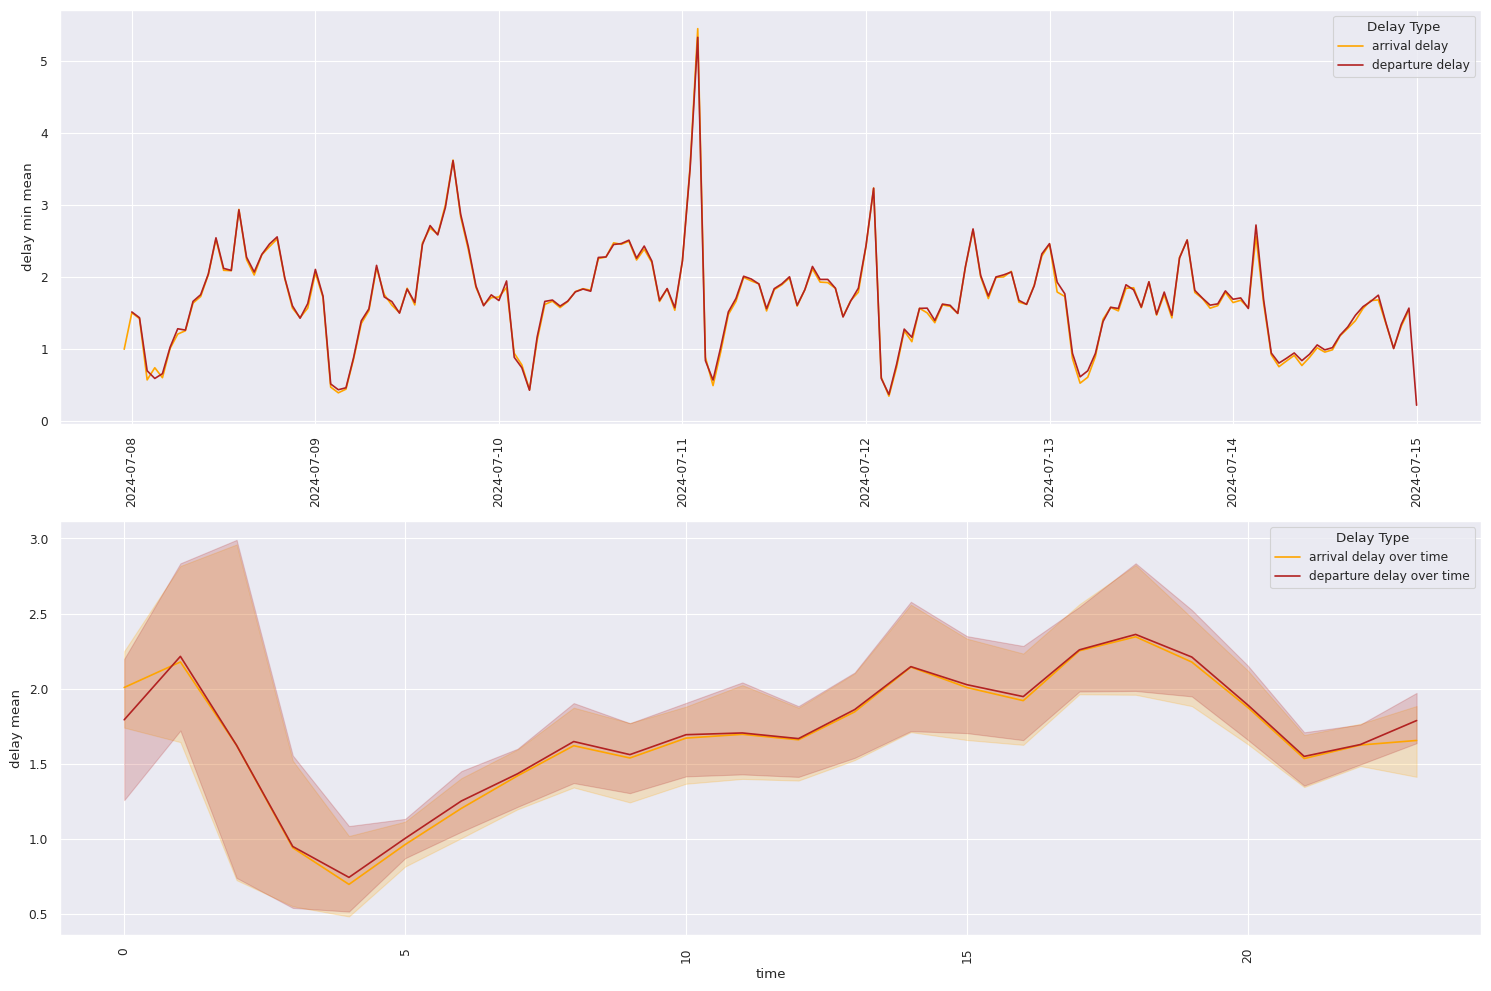

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 10))

sns.lineplot(df_mean_arrival, x="arrival_plan_datetime", y="arrival_delay_m", label="arrival delay", ax=axes[0], color="orange")
sns.lineplot(df_mean_departure, x="departure_plan_datetime", y="departure_delay_m", label="departure delay", ax=axes[0], color="firebrick")
axes[0].set_xlabel("")
axes[0].set_ylabel("delay min mean")
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title="Delay Type")

sns.lineplot(df_mean_arrival, x="arrival_plan_hour", y="arrival_delay_m", label="arrival delay over time", ax=axes[1], color="orange")
sns.lineplot(df_mean_departure, x="departure_plan_hour", y="departure_delay_m", label="departure delay over time", ax=axes[1], color="firebrick")
axes[1].set_xlabel("time")
axes[1].set_ylabel("delay mean")
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title="Delay Type")

plt.tight_layout()
plt.show()

The first plot portrays how the mean arrival and departure delays fluctuate across several days from 2024-07-08 to 2024-07-15. In fact, both arrival (orange line) and departure (firebrick line) delays follow a similar trend, often overlapping, which suggests that delays in arrivals and departures are highly correlated. In addition, notable spikes can be observed on 2024-07-11, where the delay increases significantly for both arrivals and departures before stabilizing again. This could indicate a specific event, operational issue, or weather condition that caused a substantial delay on this date.
Overall, the delays remain under 5 minutes for the majority of the days, although there is some day-to-day variation.


On the other hand, the second plot examines how the mean delay for both arrivals and departures changes over the course of a day (represented by the time on the x-axis). There is a clear trend where delays are highest at the beginning and end of the day (around hours 0 and 20), with a noticeable dip in delays around hour 6. This may correspond to periods of lower train traffic or more consistent operations. As the day progresses, delays tend to increase, peaking at hours 15-17, which could correspond to peak travel times. After this, delays decrease slightly, only to rise again toward the end of the operational day.

The shaded regions around each line indicate the variability of delays at each time point. The variability is greater during the late afternoon and evening hours (15:00 to 20:00), suggesting that delays can be more unpredictable during this period.

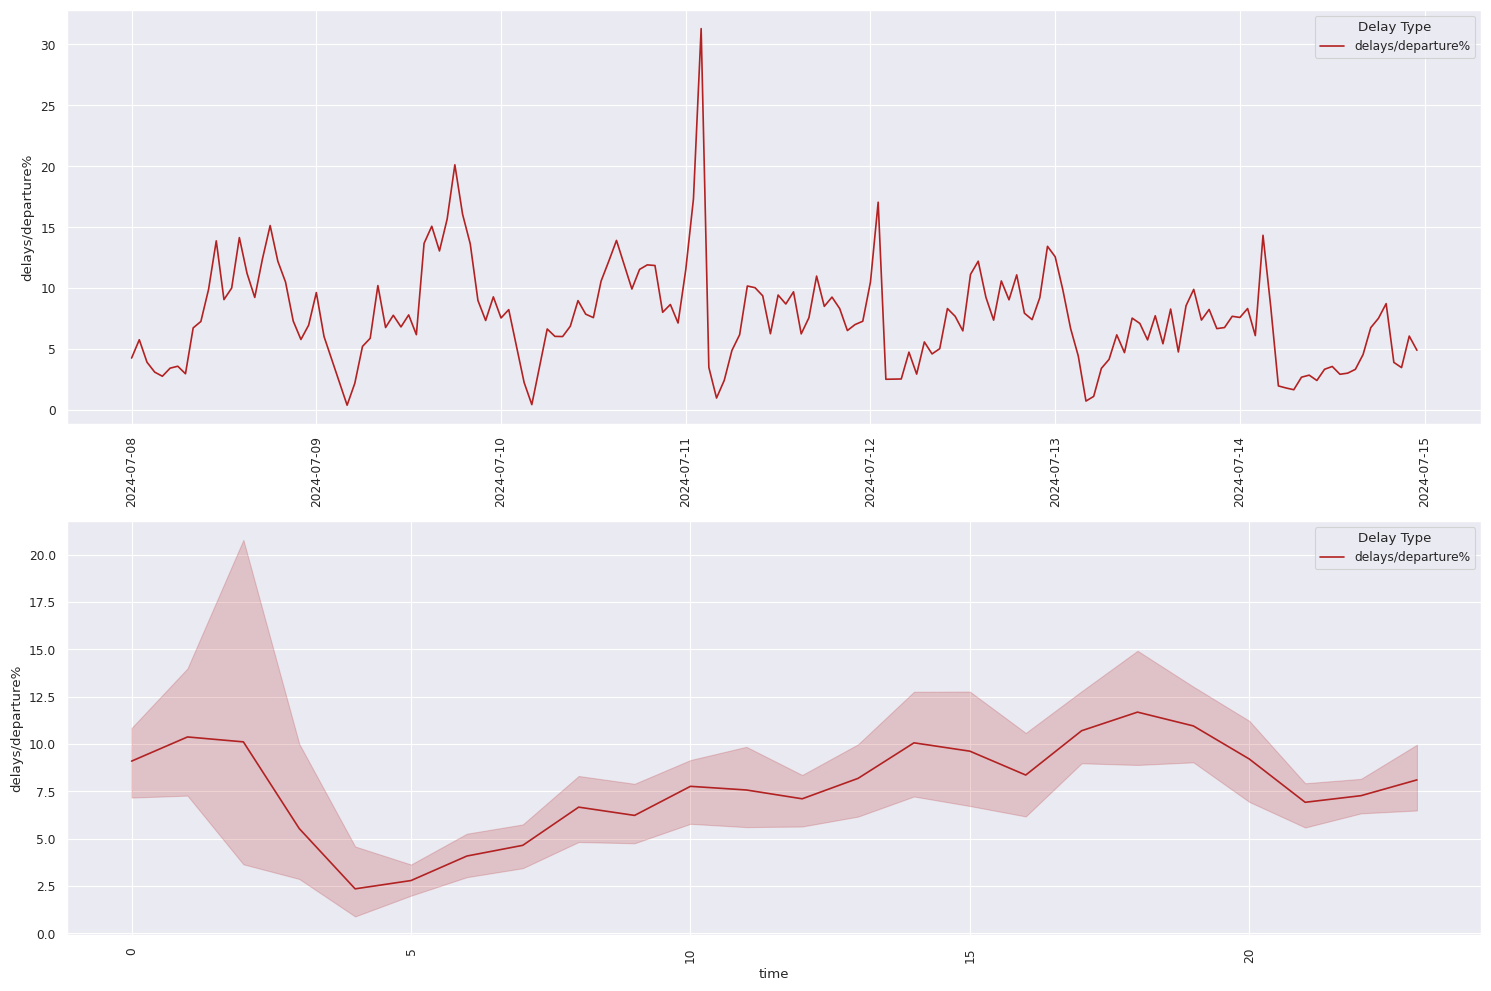

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 10))

# First plot: arrival and departure delays over datetime
sns.lineplot(df_final_hour, x="departure_plan_datetime", y="delay_percentage", label="delays/departure%", ax=axes[0], color="firebrick")
axes[0].set_xlabel("")
axes[0].set_ylabel("delays/departure%")
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title="Delay Type")

# Second plot: arrival and departure delays over time of day
sns.lineplot(df_final_hour, x="departure_plan_hour", y="delay_percentage", label="delays/departure%", ax=axes[1], color="firebrick")
axes[1].set_xlabel("time")
axes[1].set_ylabel("delays/departure%")
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title="Delay Type")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Based on the first chart there are significant spikes on 2024-07-11 and 2024-07-12, where the percentage of delayed departures reaches around 25% at its peak. This could indicate a specific disruption or operational issue on those dates, the percentage of delays fluctuates between 5% and 20% throughout the rest of the week, with no significant downward trends, indicating consistent delays over time.

Moreover, the spike on 2024-07-11 stands out, representing a sharp increase in delays, followed by a quick recovery.

The second plot shows the percentage of delayed departures across different hours of the day (from 0 to 24 hours), it is visible that the percentage of delays is highest during the early morning (0-2 hours), reaching around 20%, and dips to its lowest around 5-6 hours. From noon onwards (around hour 12), delays gradually increase again, peaking at around hour 15-18, before tapering off slightly toward the late evening.

The shaded area around the line indicates the variability or uncertainty in the delay percentages. Early morning and late afternoon hours seem to exhibit the highest variability, suggesting that delays during these times can fluctuate more dramatically than during midday periods.

In [ ]:
df_dep_mean_cat = df_departure.groupby(["departure_plan_datetime", "category"], as_index=False).departure_delay_m.mean()
df_dep_mean_cat2 = df_departure.groupby(["departure_plan_hour", "category"], as_index=False).departure_delay_m.mean()

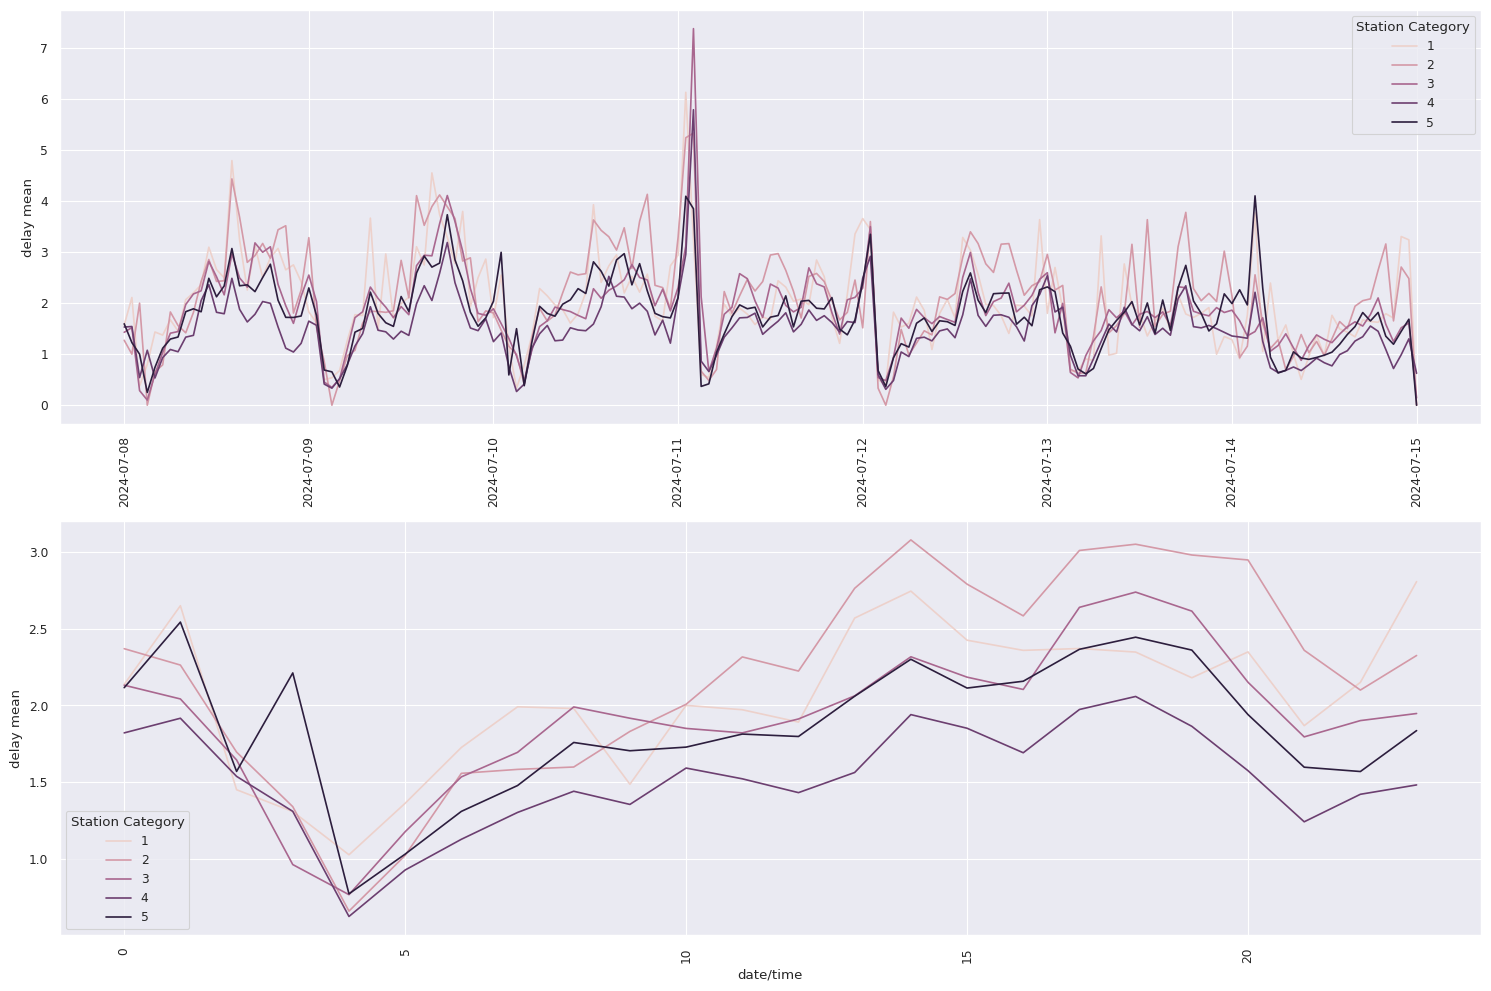

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 10))

sns.lineplot(df_dep_mean_cat, x="departure_plan_datetime", y="departure_delay_m", hue="category", ax=axes[0])
axes[0].set_xlabel("")
axes[0].set_ylabel("delay mean")
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title="Station Category")

sns.lineplot(df_dep_mean_cat2, x="departure_plan_hour", y="departure_delay_m", hue="category", ax=axes[1])
axes[1].set_xlabel("date/time")
axes[1].set_ylabel("delay mean")
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title="Station Category")

plt.tight_layout()
plt.show()

In [ ]:
state_list = df_clean.state.unique()
frames = {}
for state in state_list:
    frames[state] = df_clean[df_clean["state"] == state]

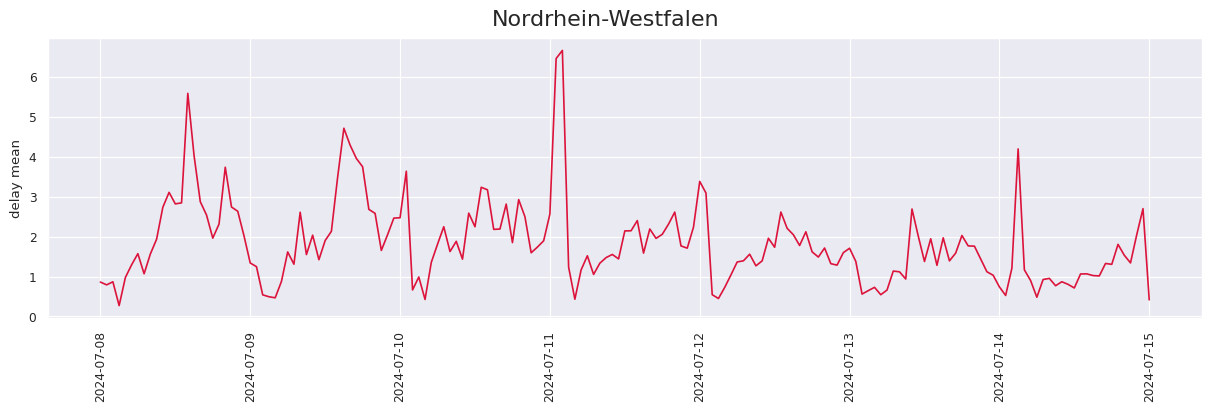

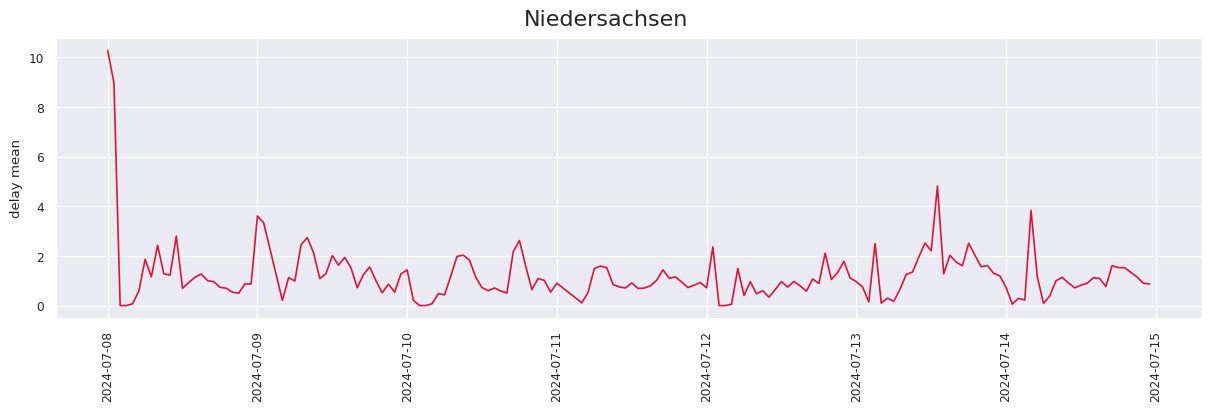

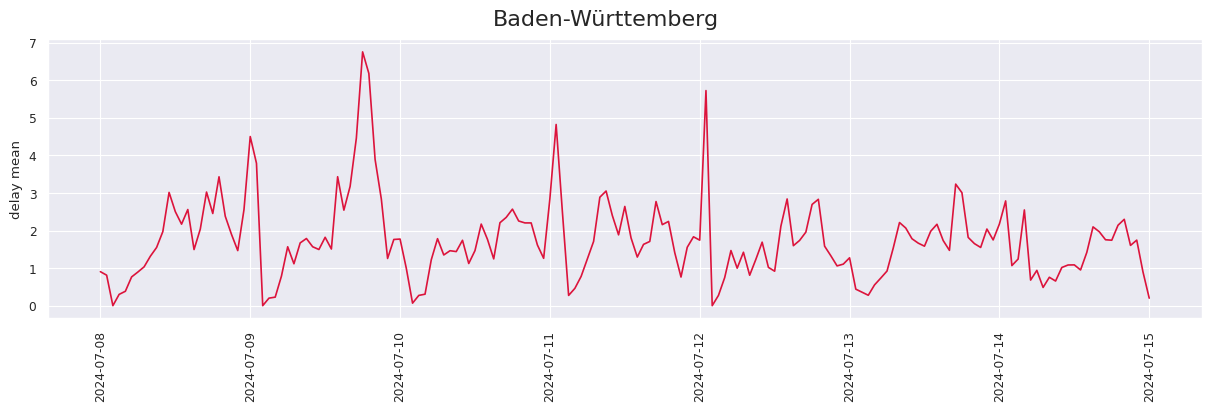

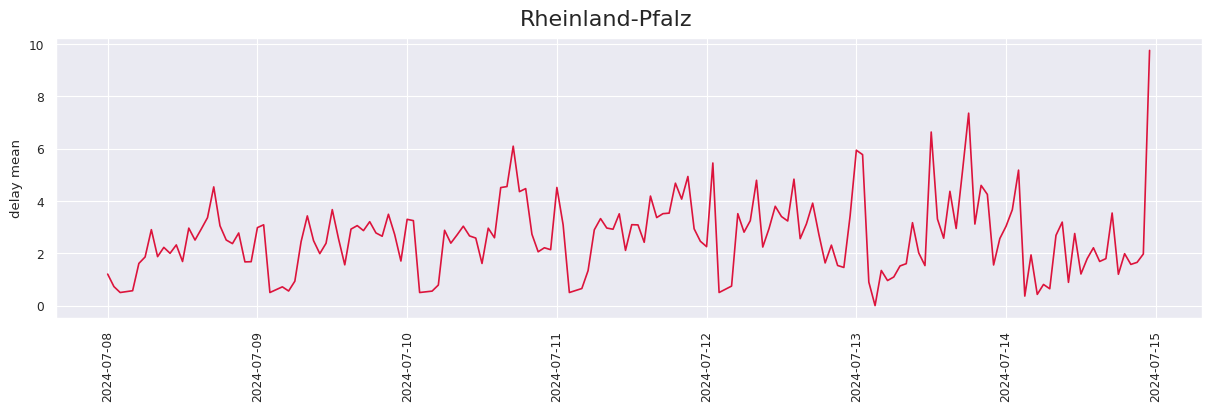

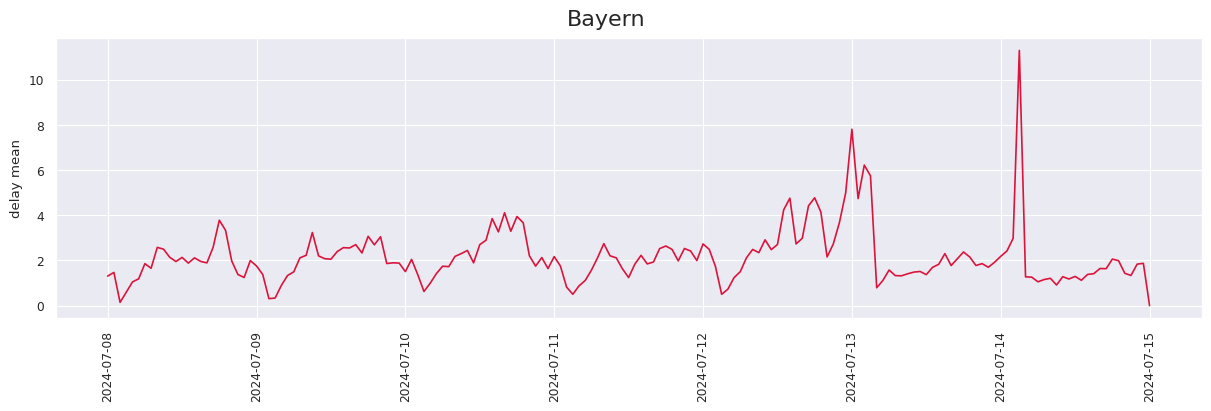

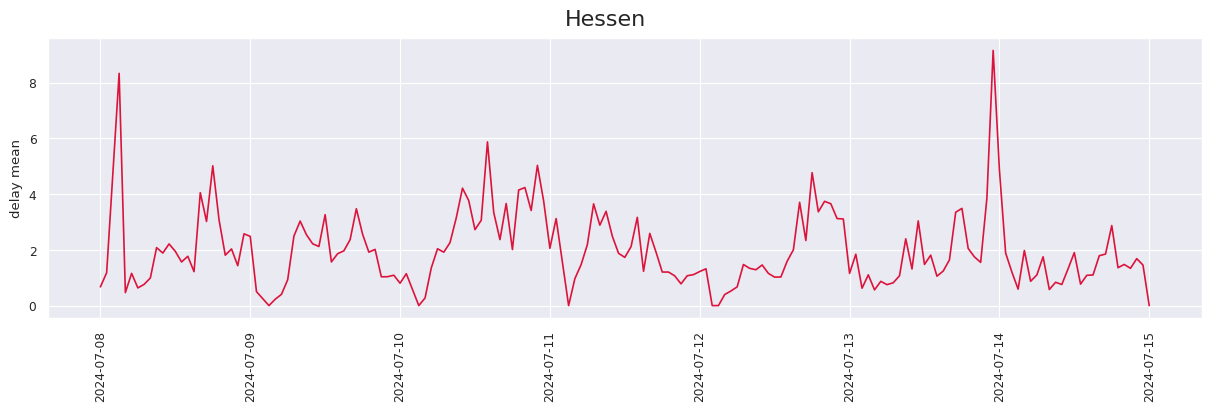

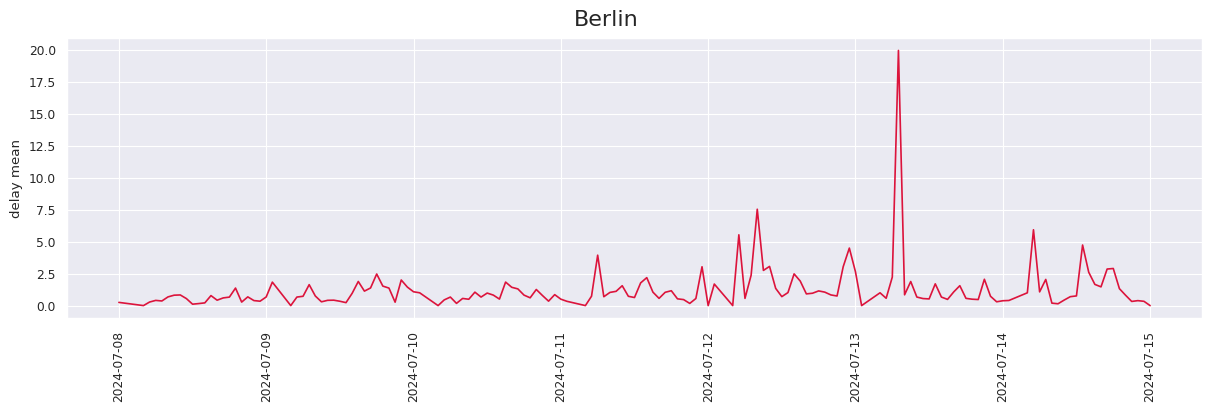

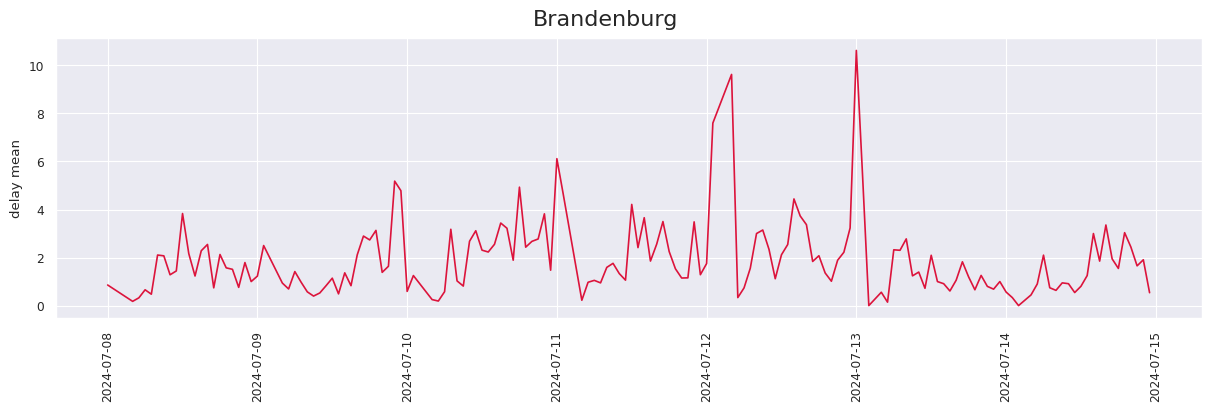

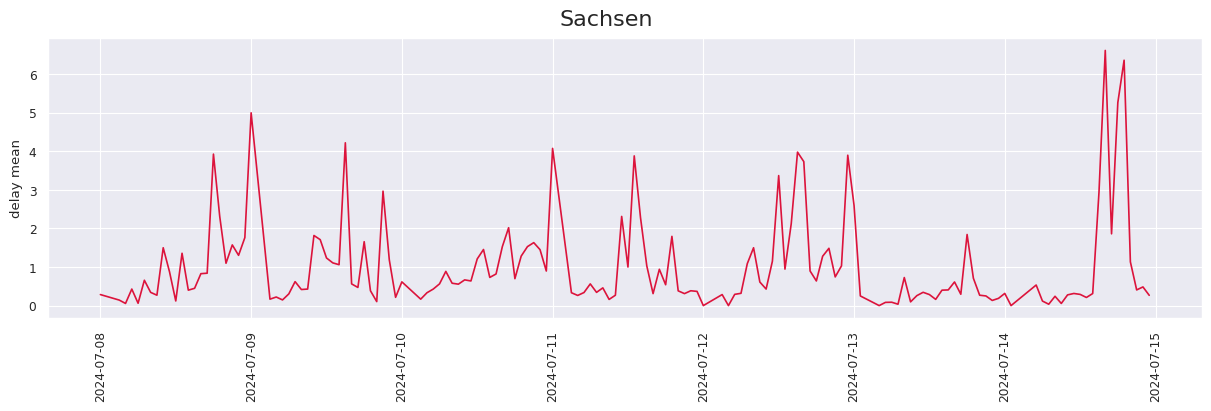

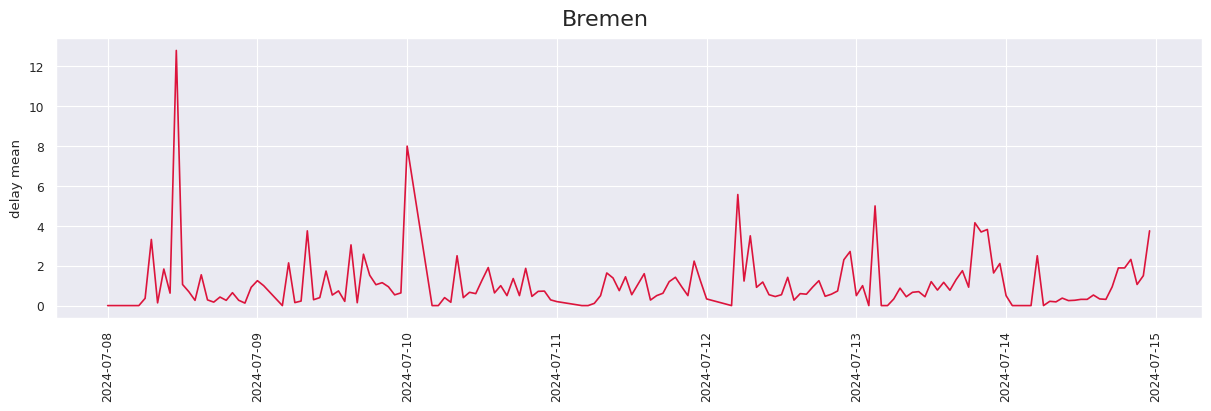

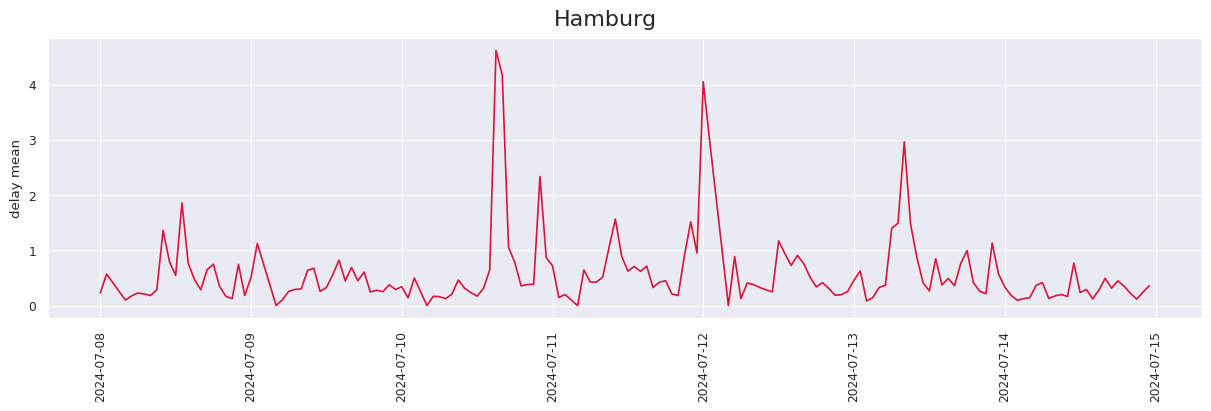

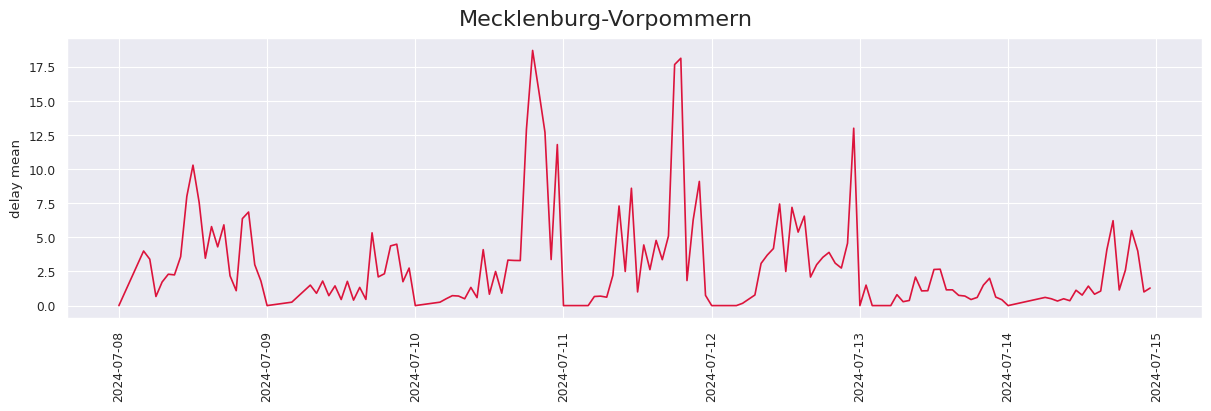

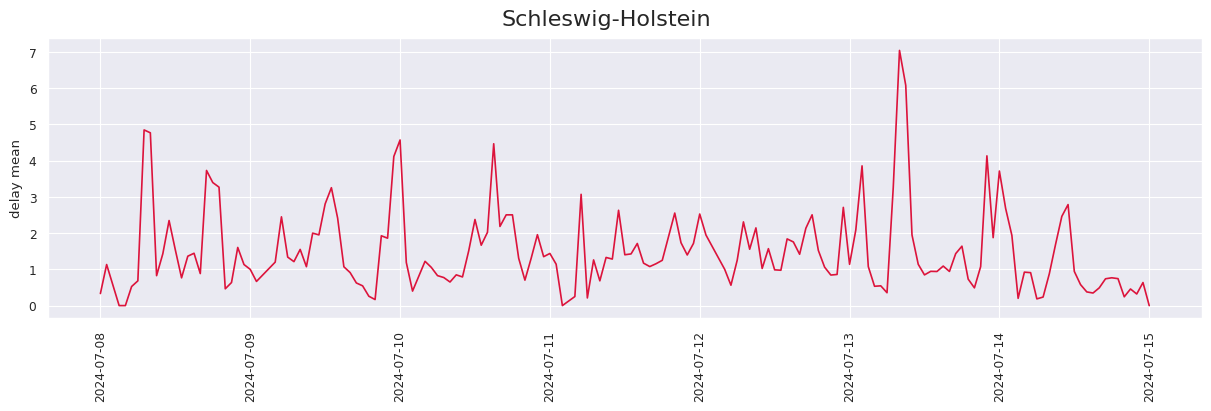

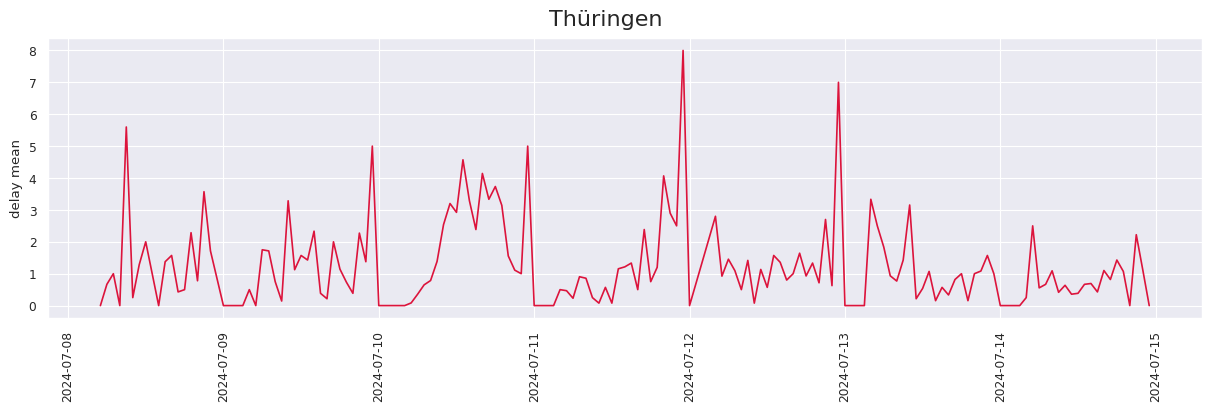

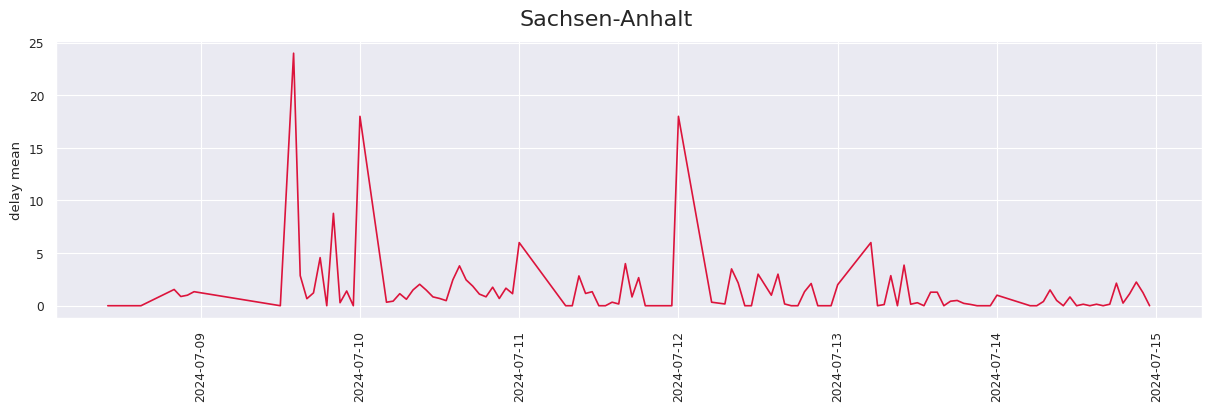

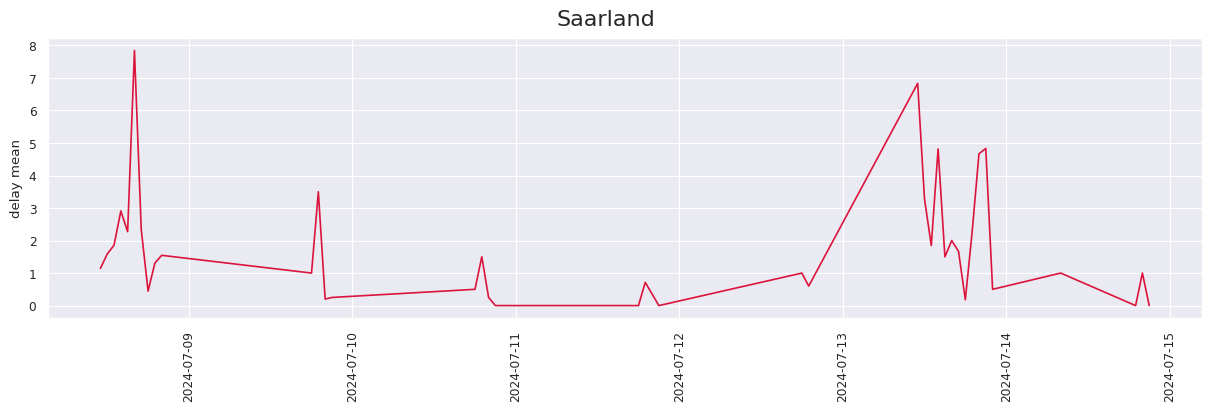

In [ ]:
for state in state_list:
    fig, axes = plt.subplots(1, 1, figsize=(12, 4), constrained_layout=True)
    df_temp = frames[state].copy()
    df_temp.set_index('departure_plan', inplace=True)
    numeric_cols = df_temp.select_dtypes(include=['float64', 'int64'])
    hourly_data = numeric_cols.resample('h').mean()

    sns.lineplot(hourly_data, x=hourly_data.index,  y="departure_delay_m", ax=axes, color="firebrick")
    axes.set_xlabel("")
    axes.set_ylabel("delay mean")
    axes.tick_params(axis='x', rotation=90)

    fig.suptitle(state, fontsize=16)
    plt.show()